# Sentiment Analysis for Mental Health Monitoring

#### Name: Jasser Abdelfattah

#### UH ID: 21033101


## Data Collection


In [1]:
import pandas as pd

In [2]:
# Read CSV file using pandas
df = pd.read_csv('Data/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [3]:
rows, columns = df.shape
print(f'Rows: {rows} , Columns: {columns}')

Rows: 53043 , Columns: 3


In [4]:
df.info

<bound method DataFrame.info of        Unnamed: 0                                          statement   status
0               0                                         oh my gosh  Anxiety
1               1  trouble sleeping, confused mind, restless hear...  Anxiety
2               2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3               3  I've shifted my focus to something else but I'...  Anxiety
4               4  I'm restless and restless, it's been a month n...  Anxiety
...           ...                                                ...      ...
53038       53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039       53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

[53043 rows x 3 columns]>

In [5]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


## Data Preprocessing


In [6]:
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
# Create a deep copy of the Pandas DataFrame
df_copy = df.copy(deep=True)

In [8]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Tokenization and stopword removal
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join words back into a cleaned string
    return ' '.join(words)

In [9]:
# Apply the clean_text function to the 'text_column' of df_copy
df_copy['cleaned_statement'] = df_copy['statement'].apply(clean_text)

In [10]:
# Droped out Unnamed: 0 Column
df_copy = df_copy.drop(columns=['Unnamed: 0'])

In [11]:
df_copy.head()

,statement,status,cleaned_statement
0,oh my gosh,Anxiety,oh gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,Anxiety,ive shifted focus something else im still worried
4,"I'm restless and restless, it's been a month n...",Anxiety,im restless restless month boy mean


## EDA


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

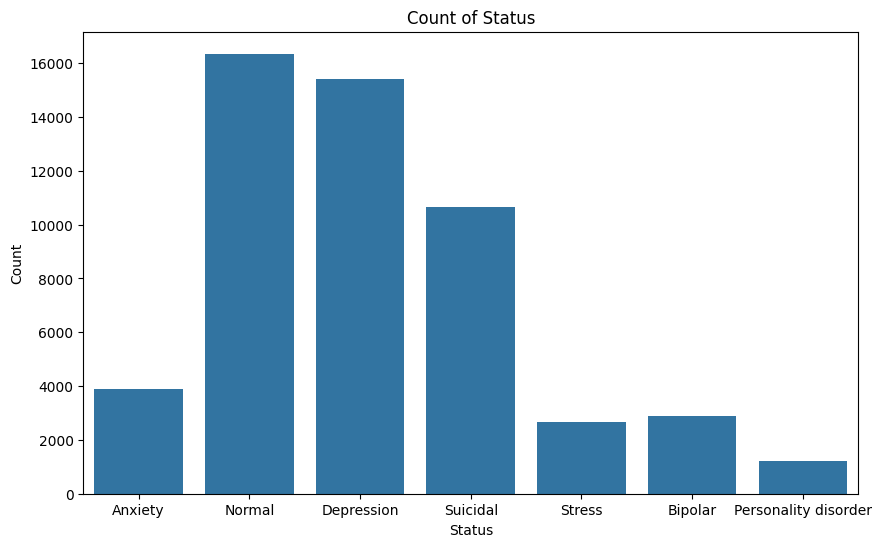

In [13]:
# Bar Plot: Count of each status
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df_copy)
plt.title('Count of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

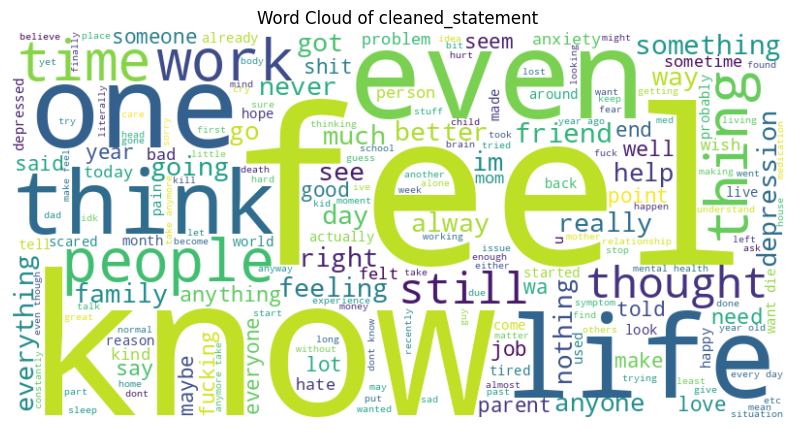

In [14]:
# Word Cloud: Common words in the statements
text = ' '.join(df_copy['cleaned_statement'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of cleaned_statement')
plt.show()

## Spliting the data


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_copy['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [17]:
# Mapping function for binary classification
def map_status_to_binary(status):
    abnormal_classes = ['Anxiety', 'Depression', 'Suicidal', 'Stress', 'Bipolar', 'Personality disorder']
    return 'abnormal' if status in abnormal_classes else 'normal'

In [18]:
# Apply mapping to the `status` column
df_copy['binary_status'] = df_copy['status'].apply(map_status_to_binary)

In [19]:
# Split the data
X = df_copy['cleaned_statement']
y = df_copy['binary_status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Get unique classes in y
unique_classes = y.unique()
print(unique_classes)

['abnormal' 'normal']


In [21]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42434,)
X_test shape: (10609,)
y_train shape: (42434,)
y_test shape: (10609,)


## Reading Unseen Dataset


In [22]:
UNSEEN_DATA = pd.read_csv("Data/unseen_data.csv")
UNSEEN_DATA.head()

,Post,Label
0,"I feel like my heart is racing, and I can't ca...",Anxiety
1,"One moment I'm laughing uncontrollably, and th...",Bipolar
2,"Nothing excites me anymore, and even getting o...",Depression
3,I had a great day at work and treated myself t...,Normal
4,Sometimes I feel like I'm living someone else'...,Personality disorder


## Vectorization and Modeling


In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

### Naive Bayes classifier Modeling


In [24]:
# Create the pipeline for Naive Bayes model
nb_pipeline = Pipeline([
    ('vect', CountVectorizer()),         # Convert text to token counts
    ('tfidf', TfidfTransformer()),       # Convert counts to TF-IDF scores
    ('clf', MultinomialNB(alpha=1.0)),   # Apply Naive Bayes classifier, alpha applied for smoothing
])

In [25]:
# Fit the model with the training data
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [26]:
# Predict using the test data
y_pred = nb_pipeline.predict(X_test)

In [27]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7258,   24],
       [2434,  893]])

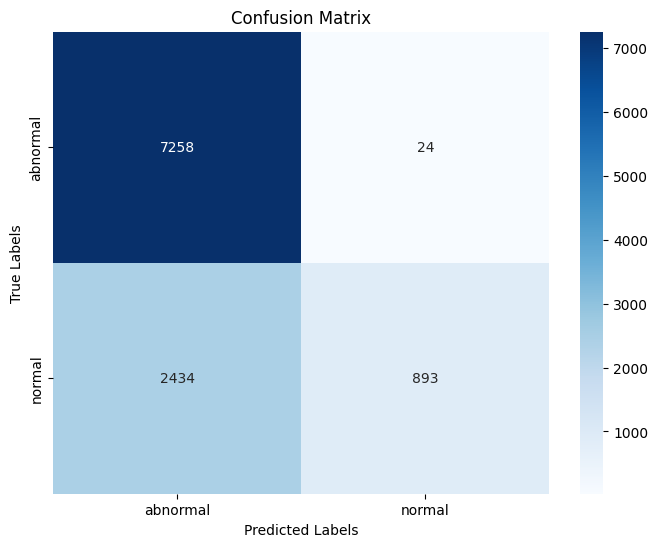

In [28]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_pipeline.classes_, yticklabels=nb_pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
# Display classification report (precision, recall, f1-score, etc.)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Classification Report:
               precision    recall  f1-score   support

    abnormal       0.75      1.00      0.86      7282
      normal       0.97      0.27      0.42      3327

    accuracy                           0.77     10609
   macro avg       0.86      0.63      0.64     10609
weighted avg       0.82      0.77      0.72     10609



In [30]:
import joblib

# Assuming nb_model is your trained model
# Save the model to a file
joblib.dump(nb_pipeline, 'Models/sentiment_analysis_naive_bayes_model.pkl')

['Models/sentiment_analysis_naive_bayes_model.pkl']

In [31]:
# Load the saved pipeline
loaded_pipeline = joblib.load('Models/sentiment_analysis_naive_bayes_model.pkl')

# Example: New unseen posts
new_posts = UNSEEN_DATA['Post']

# Predict the sentiment of new posts using the loaded model
predictions = loaded_pipeline.predict(new_posts)

# Output the predictions
for post, prediction in zip(new_posts, predictions):
    print(f"Post: {post} \nPrediction: {prediction}\n")

Post: I feel like my heart is racing, and I can't catch my breath. 
Prediction: abnormal

Post: One moment I'm laughing uncontrollably, and the next I'm crying for no reason. 
Prediction: abnormal

Post: Nothing excites me anymore, and even getting out of bed feels like a chore. 
Prediction: abnormal

Post: I had a great day at work and treated myself to some ice cream afterward! 
Prediction: normal

Post: Sometimes I feel like I'm living someone else's life, and it's confusing. 
Prediction: abnormal

Post: The constant deadlines are crushing me; I can't keep up. 
Prediction: abnormal

Post: No one would even notice if I disappeared. 
Prediction: abnormal



### Logistic Regression Classifier Modeling


In [32]:
# Create the pipeline for Logistic Regression model
lr_pipeline = Pipeline([
    ('vect', CountVectorizer()),         # Convert text to token counts
    ('tfidf', TfidfTransformer()),       # Convert counts to TF-IDF scores
    ('clf', LogisticRegression(max_iter=1000)),  # Apply Logistic Regression, max_iter applied for training limit
])

In [33]:
# Fit the model with the training data
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(max_iter=1000))])

In [34]:
# Predict using the test data
y_pred = lr_pipeline.predict(X_test)

In [35]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6943,  339],
       [ 344, 2983]])

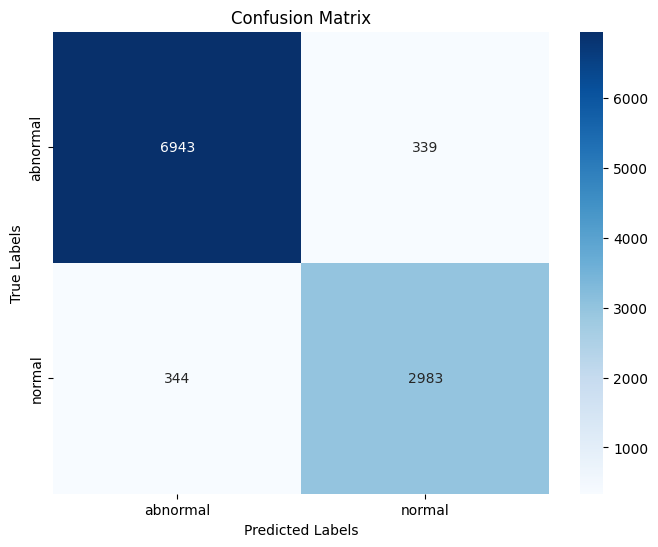

In [36]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr_pipeline.classes_, yticklabels=lr_pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [37]:
# Display classification report (precision, recall, f1-score, etc.)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    abnormal       0.95      0.95      0.95      7282
      normal       0.90      0.90      0.90      3327

    accuracy                           0.94     10609
   macro avg       0.93      0.93      0.93     10609
weighted avg       0.94      0.94      0.94     10609



In [38]:
# Save the model to a file
joblib.dump(lr_pipeline, 'Models/sentiment_analysis_logistic_regression_model.pkl')

['Models/sentiment_analysis_logistic_regression_model.pkl']

In [39]:
# Load the saved pipeline
loaded_pipeline = joblib.load('Models/sentiment_analysis_logistic_regression_model.pkl')

# New unseen posts
new_posts = UNSEEN_DATA['Post']

# Predict the sentiment of new posts using the loaded model
predictions = loaded_pipeline.predict(new_posts)

# Output the predictions
for post, prediction in zip(new_posts, predictions):
    print(f"Post: {post} \nPrediction: {prediction}\n")

Post: I feel like my heart is racing, and I can't catch my breath. 
Prediction: normal

Post: One moment I'm laughing uncontrollably, and the next I'm crying for no reason. 
Prediction: normal

Post: Nothing excites me anymore, and even getting out of bed feels like a chore. 
Prediction: abnormal

Post: I had a great day at work and treated myself to some ice cream afterward! 
Prediction: normal

Post: Sometimes I feel like I'm living someone else's life, and it's confusing. 
Prediction: abnormal

Post: The constant deadlines are crushing me; I can't keep up. 
Prediction: normal

Post: No one would even notice if I disappeared. 
Prediction: normal

